# ZFOURGE SED Template Processing 
Using the generated ZFOURGE SED templates from the cdfs field, we explore how these SEDs will react in the UVJ colour space to see if the UVJ coordinates are still in the sample place.


In [496]:
import matplotlib.pyplot as plt
import astropy.units as u
import numpy as np
import pandas as pd
import os
from astLib import astSED
import astropy.io.fits as fits
from carf import * # custom module for functions relating to the project

# So that we can change the helper functions without reloading the kernel
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [497]:
# We are attempting to read in a new set of SEDs that have been generated using a variation of Michael's ZFOURGE SED processing code.
# the SEDs are in the form of csvs, this can be explored in the zfourge/seds
# directory. The csvs are in the form of:
# Wavelength (microns), Flux Density (10^-19erg_s_cm^2_Angstrom)

zfourge_folderpath = os.path.join('datasets', 'zfourge', 'SEDs')
# We would like to create a function to read this in
def read_zfourge_template(folder_path, name):
    """_summary_

    Args:
        folder_path (string): path to the folder where the SED templates are located
        name (string): name of the object
    
    Returns:
        df: Returns a dataframe containing the SED template
        objname: Returns the name of the object
    """
    folder_path = os.path.join(folder_path)
    files_in_folder = os.listdir(folder_path)

    for file in files_in_folder:
        # Find filepath and convert to df
        
        # get rid of units in the filename
        objname = file.split('_units')[0]
        objname = objname.split('_')[1]
        if objname == name:
            filepath = os.path.join(folder_path, file)
            df = pd.read_csv(filepath)
            
            print(df)
            # our wavelength is in microns, convert to Angstroms
            #df[0] = df[0] * 10000 # microns 10^-6 -> Angstroms 10^-10 
            
            # for the first column, we want to convert to Angstroms
            #df.iloc[:, 0] = df.iloc[:, 0] * 10000
            
            # Name each of the columns appropriately
            df.columns = ['lambda (Angstroms)', 'Total Flux (erg/s/cm^2/Angstrom)']
            print(objname)
            return df, objname
        
    
    return None, None

df, objname = read_zfourge_template(zfourge_folderpath, '7544')

        Wavelength   FluxDensity
0     1.931438e+02  1.710123e-03
1     1.995112e+02  1.678230e-03
2     2.037561e+02  1.690664e-03
3     2.080010e+02  1.691892e-03
4     2.122459e+02  1.693750e-03
...            ...           ...
2813  1.697967e+06  1.090258e-07
2814  2.122459e+06  4.464007e-08
2815  2.546951e+06  2.181650e-08
2816  2.971443e+06  1.203468e-08
2817  3.395935e+06  7.653515e-09

[2818 rows x 2 columns]
7544


In [498]:
    
def read_zfourge_galaxy_templates(folder_path):
    """_summary_

        Args:
            folder_path (string): path to the folder where the SED templates are located
    
        Returns:
            df_list: Returns a list of dataframes containing the SED templates
            objname_list: Returns a list of the names of the objects
    """
    df_list = []
    objname_list = []
    folder_path = os.path.join(folder_path)
    files_in_folder = os.listdir(folder_path)

    for file in files_in_folder:

        # Find filepath and convert to df
        objname = file.split('_units')[0]
        objname = objname.split('_')[1]
        filepath = os.path.join(folder_path, file)
        df = pd.read_csv(filepath)
        
        # Convert microns to angstroms    
        df.iloc[:, 0] = df.iloc[:, 0] 
        
        # name each of the columns appropriately
        df.columns = ['lambda (Angstroms)', 'Total Flux (erg/s/cm^2/Angstrom)']
            
        # Append the dataframe to the list    
        df_list.append(df)
        objname_list.append(objname)
        
        
    return df_list, objname_list


In [499]:
# Filters
pb_U_path = os.path.join('datasets', 'Filters', 'Generic_Johnson.U.dat')
pb_V_path = os.path.join('datasets', 'Filters', 'Generic_Johnson.V.dat')
pb_J_path = os.path.join('datasets', 'Filters', '2MASS_2MASS.J.dat')

# Skirtor models
skirtor_folderpath = os.path.join('datasets', 'Templates', 'Skirtor')

In [500]:
# In addition also use astSED to create filters
pb_U = astSED.Passband(pb_U_path, normalise=False)
pb_V = astSED.Passband(pb_V_path, normalise=False)
pb_J = astSED.Passband(pb_J_path, normalise=False)

In [501]:
# Read in all the ZFOURGE templates
df_list, objname_list = read_zfourge_galaxy_templates(zfourge_folderpath)

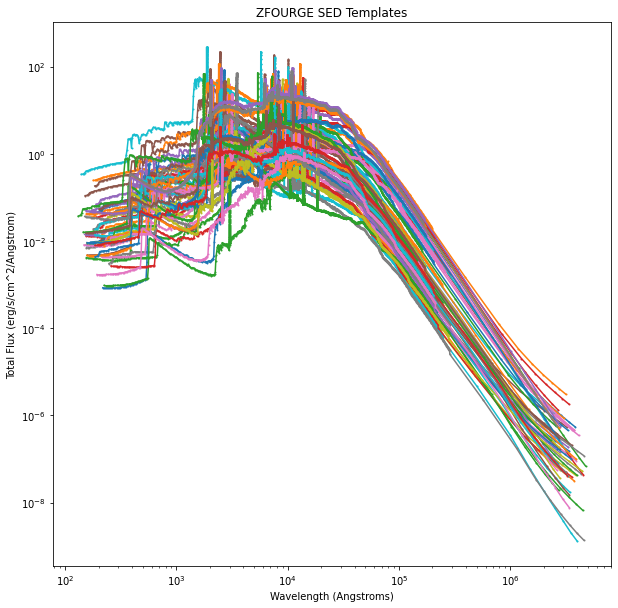

In [502]:
# Plot all of the SEDS
plt.figure(figsize=(10, 10))
for i in range(len(df_list)):
    plt.loglog(df_list[i].iloc[:, 0], df_list[i].iloc[:, 1], label=objname_list[i], marker='o', markersize=1)
#plt.legend()
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Total Flux (erg/s/cm^2/Angstrom)')
plt.title('ZFOURGE SED Templates')
plt.show()



In [503]:
# We now have some SED's that can be put through my fitting code to see how the UVJ diagram looks,
# and to see if it behaves as expected

# We will need to convert the SEDs to a format that can be used by the fitting code
# We can attempt to use the composite code, without the need for the SED fitting code
uv_colours = []
vj_colours = []

# for better coverage, create an AGN SED, combine them at 0% and have a look
agn_df, params = create_type1_skirtor_agn(skirtor_folderpath)


# alpha list
alpha_list = np.linspace(0, 1, 11)

#print(df_list[0])
# create a composite set
composite_df = create_composite_sed(agn_df, df_list[0], 0) # This is just for one, with no agn juice added
print(composite_df)


There are  13  NaN values in the galaxy SED
      lambda (Angstroms)  Total Flux (erg/s/cm^2/Angstrom)
0           1.913596e+02                      4.577087e-02
1           1.976681e+02                      4.640134e-02
2           2.018738e+02                      4.764179e-02
3           2.060796e+02                      5.042023e-02
4           2.089296e+02                      5.359561e-02
...                  ...                               ...
2915        2.523423e+06                      2.651084e-07
2916        2.884032e+06                      2.075054e-07
2917        2.943994e+06                      1.979272e-07
2918        3.311311e+06                      1.587991e-07
2919        3.364564e+06                      1.531263e-07

[2920 rows x 2 columns]


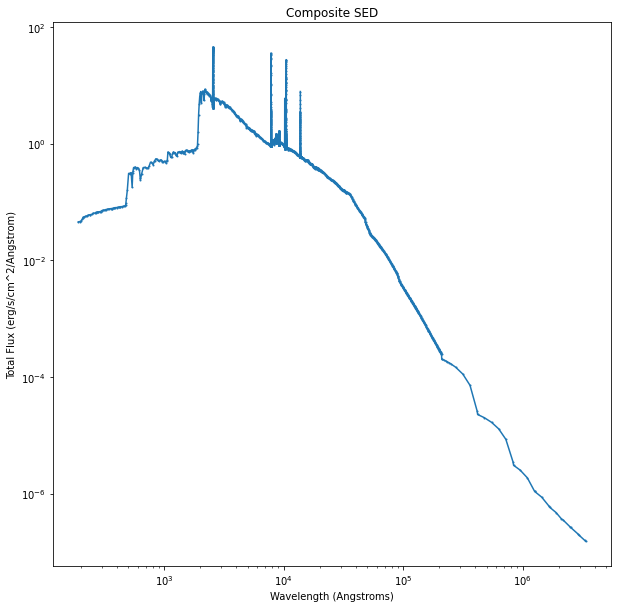

In [504]:
composite_df
# Plot this
plt.figure(figsize=(10, 10))
plt.loglog(composite_df.iloc[:, 0], composite_df.iloc[:, 1], label='Composite', marker='o', markersize=1)
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Total Flux (erg/s/cm^2/Angstrom)')
plt.title('Composite SED')
plt.show()


In [505]:


print(len(df_list))
for i, sed_data in enumerate(df_list):
            # Create an SED object using astSED    
    
        wl = sed_data['lambda (Angstroms)']
        fl = sed_data['Total Flux (erg/s/cm^2/Angstrom)']
        sed = astSED.SED(wavelength=wl, flux=fl, z=0.0)    
    
    # Try to calc uvj, if math domain error occurs, if bad SED, delete it
        try:
                uv = astSED.SED.calcColour(sed, pb_U, pb_V, magType='AB')
                vj = astSED.SED.calcColour(sed, pb_V, pb_J, magType='AB')
                uv_colours.append(uv)
                vj_colours.append(vj)

        except ValueError:
                
                
                # What needs to be deleted
                print('bad id:', i)
                print('objname:', objname_list[i])
                print('uv:', uv)
                print('vj:', vj)
                
                
                # Delete the SED from the list
                del df_list[i]
                del objname_list[i]
                



58
bad id: 28
objname: 21410
uv: -0.16397051580760902
vj: 0.8020577458402478
bad id: 42
objname: 26828
uv: 2.132107785989106
vj: 2.3049215559048832


In [506]:
vj_colours
#uv_colours


# For each of these SEDs, we can now plot them on the UVJ diagram
# We first want to make sure that the UVJ colours are working
# we need to go through both the UV and the VJ datasets
# and make sure that there is both an accurate UV and VJ colour
# if not remove this entry from the df_list, uv_colours and vj_colours, and objname_list

# Removing any bad entries
bad_entries = []

for i, uv in enumerate(uv_colours):
    # each loop check uv and vj for infinites, or negatives
    if np.isinf(uv) or np.isinf(vj_colours[i]):
        bad_entries.append(objname_list[i])
        del df_list[i]
        del objname_list[i]
        del uv_colours[i]
        del vj_colours[i]
        i=i-1
        
# print the list of bad entries
print(bad_entries)

['12014', '13751', '15908', '16827', '17560', '19303', '21921', '22387', '25888', '27934', '29790']


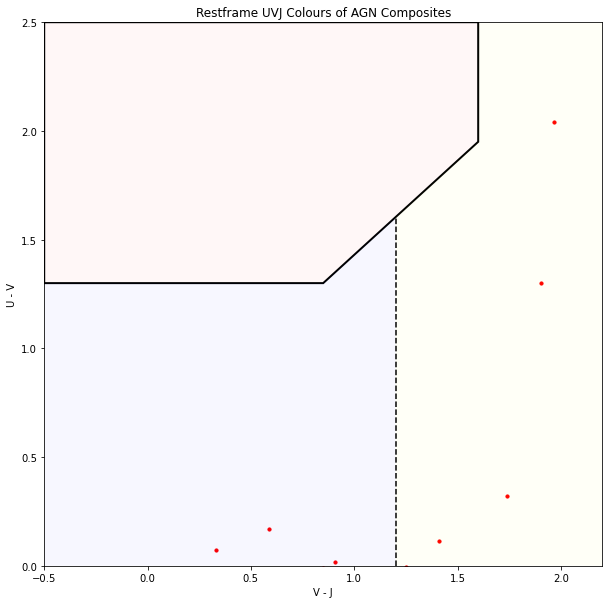

In [507]:
# Now we can plot these in UVJ space, including their relevant labels, and UV/VJ positions


plt.figure(figsize=(10, 10))

plt.scatter(vj_colours, uv_colours, c='r', s=10)

# add text to each point
#for i, txt in enumerate(objname_list):
   # plt.annotate(txt, (vj_colours[i], uv_colours[i]), fontsize=8)
    

plt.ylabel('U - V')
plt.xlabel('V - J')
plt.title("Restframe UVJ Colours of AGN Composites")
plt.xlim([-0.5, 2.2])
plt.ylim([0, 2.5])

# Define paths for selections
path_quiescent = [[-0.5, 1.3], [0.85, 1.3], [1.6, 1.95], [1.6, 2.5], [-0.5, 2.5]]
path_sf = [[-0.5, 0.0], [-0.5, 1.3], [0.85, 1.3], [1.2, 1.60333], [1.2, 0.0]]
path_sfd = [[1.2, 0.0], [1.2, 1.60333], [1.6, 1.95], [1.6, 2.5], [2.2, 2.5], [2.2, 0.0]]

# Add patches for selections
plt.gca().add_patch(plt.Polygon(path_quiescent, closed=True, fill=True, facecolor=(1, 0, 0, 0.03), edgecolor='k', linewidth=2, linestyle='solid'))
plt.gca().add_patch(plt.Polygon(path_sf, closed=True, fill=True, facecolor=(0, 0, 1, 0.03)))
plt.gca().add_patch(plt.Polygon(path_sfd, closed=True, fill=True, facecolor=(1, 1, 0, 0.03)))

# Add vertical line
plt.axvline(1.2, color='black', linestyle='--', ymin=0, ymax=1.60333/2.5)


plt.show()

